
# Executive Summary

The datasets analyzed and summarized throughout this report identify trends in Medicare patient care in terms of the most commonly undergone procedures and how coverage by state could possibly be related to median income and mortality rates. Our findings throughout this study could have significant implications to healthcare systems.


# Description of datasets: 

## [Main dataset :](https://data.cms.gov/Medicare-Inpatient/Inpatient-Prospective-Payment-System-IPPS-Provider/97k6-zzx3)

We looked into a Medicare dataset called the Provider Summary for the Top 100 Diagnosis Related Groups (DRGs) to run analyses of hospitalization data of Medicare patients. DRGs is a Medicare classification of similar diseases and clinical procedures used during hospitalization.
We used an open source dataset (from the Centers for Medicare and Medicaid Services website) which includes hospital-specific charges in over 3,000 hospitals across the country that receive Medicare Inpatient Prospective Payment Scheme (IPPS). IPPS is a payment system that covers operating costs of acute care. The dataset shows IPPS payments for the top 100 most frequently billed discharges for 2011 fiscal year for DRGs.
Our main dataset consists of 163065 observations and 13 variables which were:

1. DRG Definition: This is a classification system used by Medicare that groups similar diseases and clinical procedures together

2. Provider ID: The identification number of the healthcare provider

3. Provider name: Name of the healthcare provider

4. Provider Address: Address of healthcare provider

5. Provider City: City where povider is physically located

6. Provider State: State where provider is physically located

7. Provider Zip code: Zip code of where the provider is physically located

8. Hospital Region: Hospital Referral Region (HRR) in which provider is physically located

9. Total Discharge: Number of discharges that the provider has billed for inpatient services

10. Average covered charges: Provider’s average charge for services covered by Medicare for all DRG

11. Average total payments: The average of Medicare payments to the provider for DRG

12. Average Medicare payments: Average payment for Medicare

13. States: This we added later in our analysis so that we can join this dataset with the two others. This was not in the original data and it only had Provider State.

## Additional dataset:

We looked into two other separate datasets which were about median income and mortality rates in different states. We combined those datasets with our main dataset in order to do further analysis in R.

In [223]:
# Loading Required Libraries 
library(dplyr)
library(ggplot2)
library(tidyverse)
library(ggpubr)
library(tidyr)
library(magrittr)
#install.packages("varhandle")
library(varhandle)
#### Loading the data
income <- read.csv(file="median income data.csv", header=TRUE)
mortality <- read.csv(file="Mortality rates.csv", header=TRUE)
main_data <- read.csv(file="main.csv", header=TRUE)

#### checking data set
#str(main_data )
#str(mortality)
#str(income)

#### cleaning type and names of variables:

## main data 
main_data$DRG.Definition<- as.character(main_data$DRG.Definition)
main_data$State<-(main_data$Provider.State)

main_data $Average.Medicare.Payments<- as.character(main_data $Average.Medicare.Payments)
main_data $Average.Medicare.Payments<- as.numeric(gsub(",", "",main_data $Average.Medicare.Payments,fixed = TRUE))

main_data $Average.Covered.Charges<- as.character(main_data $Average.Covered.Charges)
main_data $Average.Covered.Charges<- as.numeric(gsub(",", "",main_data $Average.Covered.Charges,fixed = TRUE))

main_data $Average.Total.Payments<- as.character(main_data $Average.Total.Payments)
main_data $Average.Total.Payments<- as.numeric(gsub(",", "",main_data $Average.Total.Payments,fixed = TRUE))


## Mortality 
mortality$State_names<- mortality$Title..Number.of.Deaths.per.100.000.Population...The.Henry.J..Kaiser.Family.Foundation
mortality<- mortality[c(-1),]
mortality<- mortality[c(-1),]
mortality<- mortality[c(-1),]
mortality $X.1<- as.character(mortality $X.1)
mortality$X.1<- as.numeric(gsub(",", "",mortality $X.1,fixed = TRUE))
mortality$State<- mortality$X

## Income 
income$State <- as.character(income$Acronym)
income$Income<- as.character(gsub("$"," ",income$Income,fixed = TRUE))
income$Income<- as.numeric(gsub(",", "",income$Income,fixed = TRUE))

#### checking data set details 

#head(main_data)
#head(mortality)
#head(income)



In [224]:
#### Table 1: Top 10 Satets based on the Avgerage of Medicare payments costs

Tabel1<- main_data%>%
    group_by(State)%>%
      summarize(Medicare_Payment_Mean=mean(Average.Total.Payments)%>% round(1),
        Medicare_Payment_Range=paste0("(",min(Average.Total.Payments),",",max(Average.Total.Payments),")")) %>%
        arrange(desc(Medicare_Payment_Mean)) %>%
        top_n(10,Medicare_Payment_Mean)
        

(Tabel1)


State,Medicare_Payment_Mean,Medicare_Payment_Range
<fct>,<dbl>,<chr>
AK,14572.4,"(4717.04,77566.38)"
DC,12998.0,"(3247.18,99067.5)"
HI,12775.7,"(4134,76092.84)"
CA,12629.7,"(3465,156158.18)"
MD,12608.9,"(2970.93,95868.64)"
NY,11795.5,"(2901,140255.26)"
VT,11766.3,"(3669.09,56805.68)"
WY,11398.5,"(4111,52791.66)"
CT,11365.5,"(3605,73887.44)"


In [225]:
#### Table 2: Top 10 DRG catagories in US based on the frequency 

Tabel2<- main_data %>%
  group_by(DRG.Definition)%>%
  summarize(Count_DRG=n(),Coverage=mean(Average.Total.Payments))%>%
  arrange(desc(Count_DRG))%>%
  top_n(10,Count_DRG) %>%
    mutate(Percent_DRG=((Count_DRG)/sum(Count_DRG))*100)

Tabel2


DRG.Definition,Count_DRG,Coverage,Percent_DRG
<chr>,<int>,<dbl>,<dbl>
194 - SIMPLE PNEUMONIA & PLEURISY W CC,3023,6963.254,10.564020
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,2989,5353.763,10.445205
292 - HEART FAILURE & SHOCK W CC,2953,6957.832,10.319402
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",2950,5041.766,10.308918
"641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC",2899,4781.625,10.130696
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,2812,13238.823,9.826670
603 - CELLULITIS W/O MCC,2807,5798.941,9.809198
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,2750,14566.929,9.610008
191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,2720,6627.311,9.505172


In [226]:
#### Tabel 3: Top 10 DRG catagories in Minnesota based on the frequency
Tabel3<- main_data %>%
   filter (State=="MN") %>%
    group_by(DRG.Definition) %>%
    summarize(Count_MN_DRG=n(),Coverage=mean(Average.Total.Payments)) %>%
    arrange(desc(Count_MN_DRG)) %>%
    top_n(10,Count_MN_DRG) %>%
    mutate(Percent_DRG=((Count_MN_DRG)/sum(Count_MN_DRG))*100)

Tabel3


DRG.Definition,Count_MN_DRG,Coverage,Percent_DRG
<chr>,<int>,<dbl>,<dbl>
194 - SIMPLE PNEUMONIA & PLEURISY W CC,50,7031.551,10.080645
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,49,14969.202,9.879032
"641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC",48,4833.336,9.677419
292 - HEART FAILURE & SHOCK W CC,47,6985.029,9.475806
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",46,5141.594,9.274194
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,46,5412.692,9.274194
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,46,13271.516,9.274194
190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,41,8228.250,8.266129
378 - G.I. HEMORRHAGE W CC,41,7075.743,8.266129


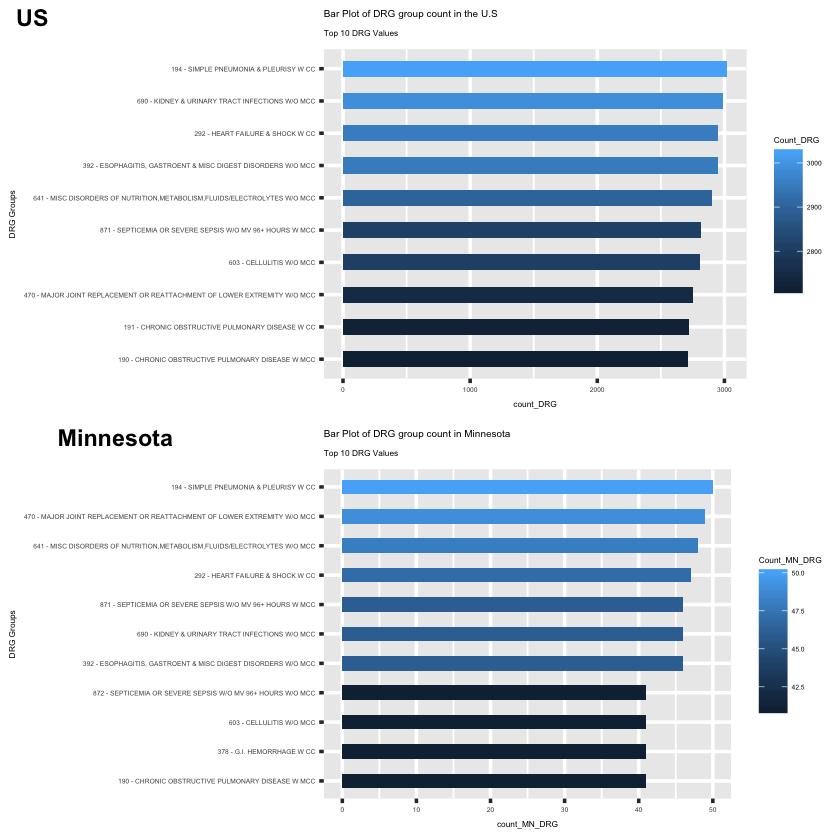

In [228]:
#### First graph: common DRG groups in US vs Minnesota

## US graph 
G1<- ggplot(Tabel2, aes(x = reorder(DRG.Definition,Count_DRG), y = Count_DRG, 
                        label = Count_DRG)) + 
  geom_bar( stat='identity',aes(fill=Count_DRG), width=.5) +
  labs(subtitle="Top 10 DRG Values", 
       title= "Bar Plot of DRG group count in the U.S", x = "DRG Groups", y = "count_DRG") + 
  coord_flip()+
     theme(text = element_text(size = 5), element_line(size = 1))
#G1

## Minnesota graph 
G2 <-ggplot(Tabel3, aes(x = reorder(DRG.Definition,Count_MN_DRG), y = Count_MN_DRG, 
                    label = Count_MN_DRG)) + 
  geom_bar( stat='identity',aes(fill=Count_MN_DRG), width=.5) +
  labs(subtitle="Top 10 DRG Values", 
       title= "Bar Plot of DRG group count in Minnesota", x = "DRG Groups", y = "count_MN_DRG") + 
  coord_flip()+
     theme(text = element_text(size = 5), element_line(size = 1))
#G2

## Combined Graph: Comparing top 10 DRG groups in US v.s Minnesota  

ggarrange(G1 ,G2,
          labels = c("US", "Minnesota"),
          ncol = 1)


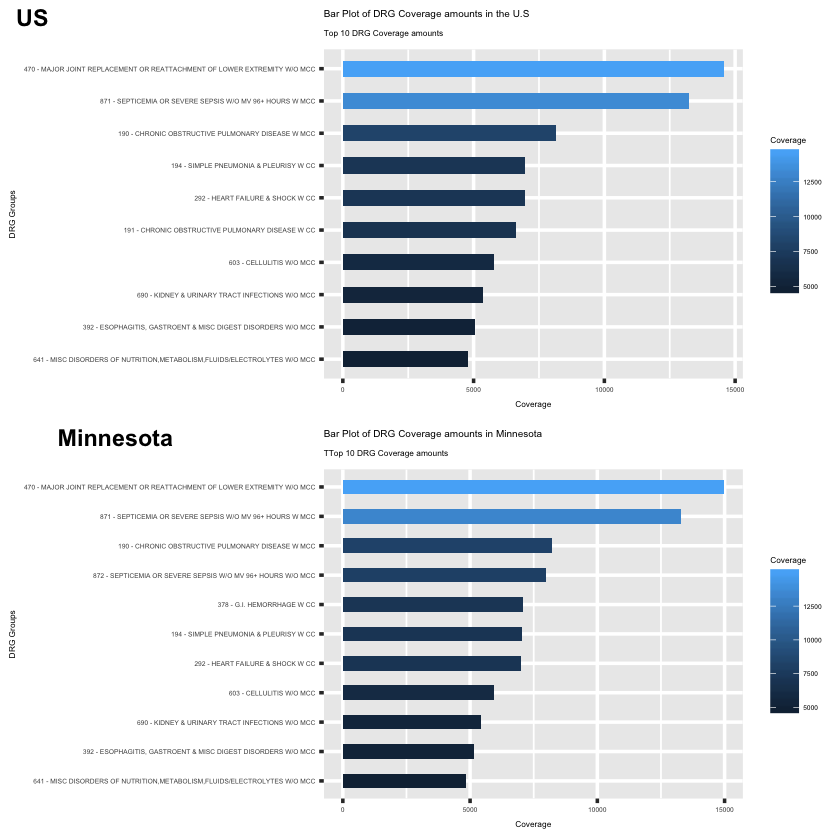

In [227]:
#### second graph : Average Coverage for common DRG groups in US vs Minnesota

## US graph 
G3<- ggplot(Tabel2, aes(x = reorder(DRG.Definition,Coverage), y =Coverage , 
                        label = Coverage)) + 
  geom_bar( stat='identity',aes(fill=Coverage), width=.5) +
  labs(subtitle="Top 10 DRG Coverage amounts", 
       title= "Bar Plot of DRG Coverage amounts in the U.S", x = "DRG Groups", y = "Coverage") + 
  coord_flip()+
     theme(text = element_text(size = 5), element_line(size = 1))


## Minnesota graph 
G4 <-ggplot(Tabel3, aes(x = reorder(DRG.Definition,Coverage), y = Coverage, 
                    label =Coverage)) + 
  geom_bar( stat='identity',aes(fill=Coverage), width=.5) +
  labs(subtitle="TTop 10 DRG Coverage amounts", 
       title= "Bar Plot of DRG Coverage amounts in Minnesota", x = "DRG Groups", y = "Coverage") + 
  coord_flip()+
     theme(text = element_text(size = 5), element_line(size = 1))


## Combined Graph: Comparing top 10 DRG groups in US v.s Minnesota  

ggarrange(G3 ,G4,
          labels = c("US", "Minnesota"),
          ncol = 1)



In [229]:
#### Cleaning and combining datasets together 

clean_data<- main_data %>%
  group_by(State)%>%
  summarize(
            Total_payments_Mean=mean(Average.Total.Payments), 
            Covered_payments_Mean=mean(Average.Covered.Charges)) %>%
            left_join(mortality,by="State")%>%
            left_join(income, by="State") %>%
            rename(Death_Rate_per_1000000=X.1) %>%
            select(State,State_names,Total_payments_Mean,Covered_payments_Mean, Death_Rate_per_1000000, Income)


head(clean_data)



Warning message:
“Column `State` joining factors with different levels, coercing to character vector”

State,State_names,Total_payments_Mean,Covered_payments_Mean,Death_Rate_per_1000000,Income
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
AK,Alaska,14572.392,40348.74,708.8,76114
AL,Alabama,7568.232,31316.46,917.7,46472
AR,Arkansas,8019.249,26174.53,900.1,43813
AZ,Arizona,10154.528,41200.06,678.5,53510
CA,California,12629.668,67508.62,618.7,67169
CO,Colorado,9502.686,41095.14,663.4,65458


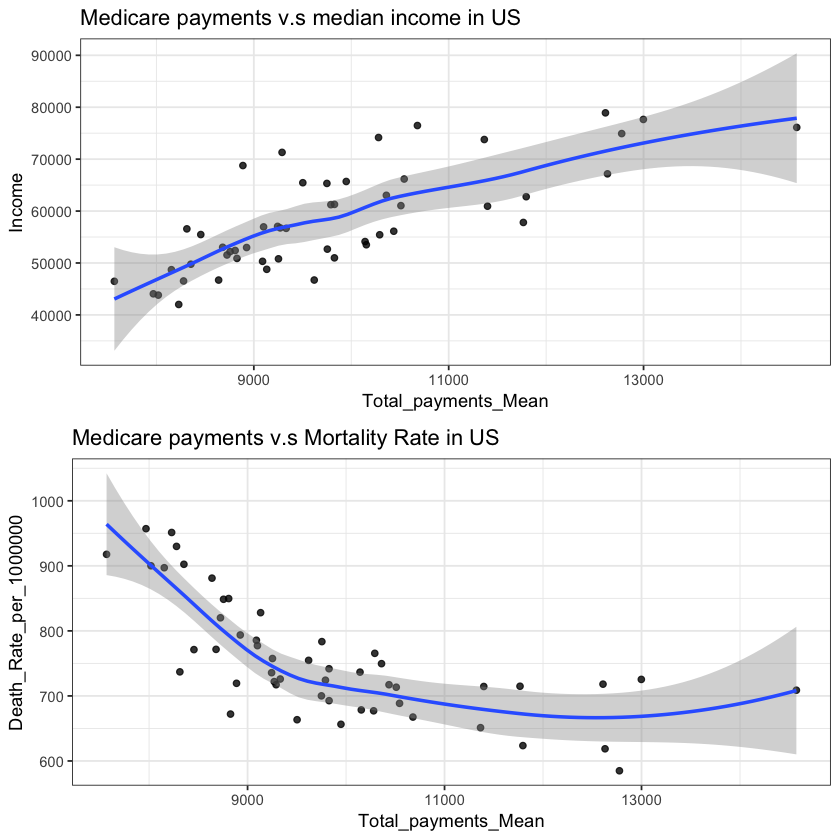

In [230]:
#### Plotting the medicare payments vs income and death rate in the US 


G5<- ggplot(clean_data, aes(x=Total_payments_Mean, y=Income) )+
  geom_point(alpha=0.8)+
      geom_smooth(method = 'loess')+
  labs(title="Medicare payments v.s median income in US")+
  theme(axis.title.x = element_text(face="bold", size=14),
        axis.title.y = element_text(face="bold", size=14))+
  theme_bw()+
  scale_color_brewer(palette="Dark2")



G6 <- ggplot(clean_data, aes(x=Total_payments_Mean, y=Death_Rate_per_1000000) )+
  geom_point(alpha=0.8)+
  geom_smooth(method = 'loess')+
  labs(title="Medicare payments v.s Mortality Rate in US")+
  theme(axis.title.x = element_text(face="bold", size=14),
        axis.title.y = element_text(face="bold", size=14))+
  theme_bw()+
  scale_color_brewer(palette="Dark2")
  


## combined graphs
ggarrange(G5 ,G6,
          ncol = 1)




K-means clustering with 3 clusters of sizes 13, 30, 8

Cluster means:
  Total_payments_Mean Death_Rate_per_1000000   Income
1           10516.126               690.7308 63591.92
2            8978.209               803.6867 51334.50
3           11821.149               681.2750 75416.25

Clustering vector:
 [1] 3 2 2 2 1 1 3 3 1 2 2 3 2 2 1 2 2 2 2 3 3 2 2 1 2 2 2 2 1 2 3 3 2 2 1 2 2 2
[39] 2 1 2 2 2 2 1 1 1 1 2 2 1

Within cluster sum of squares by cluster:
[1] 130129283 547599665  61019390
 (between_SS / total_SS =  85.1 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

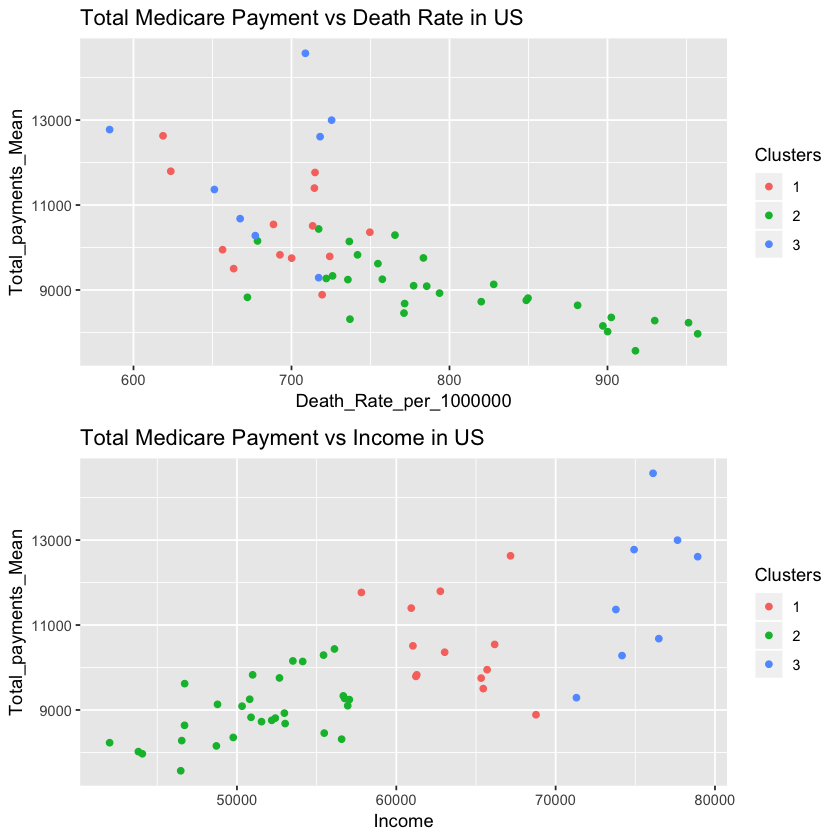

In [198]:
#### K-Means Clustering based on total Medicare Payment, death rate and income 

clustering_data<- clean_data %>%
  select(Total_payments_Mean, Death_Rate_per_1000000, Income)

result<-kmeans(clustering_data,3)
result

#### Plotting K-means Clustering results 

G7<-ggplot(clustering_data,aes(x=Death_Rate_per_1000000,y=Total_payments_Mean))+
  geom_point(aes(col=as.factor(result$cluster)))+
    labs(title="Total Medicare Payment vs Death Rate in US",col = "Clusters")

G8<-ggplot(clustering_data,aes(x=Income,y=Total_payments_Mean))+
  geom_point(aes(col=as.factor(result$cluster)))+
    labs(title="Total Medicare Payment vs Income in US",col = "Clusters")
## combined graphs
ggarrange(G7 ,G8,
          ncol = 1)


Comments:

We assumed that there could be potential problems for those states which are in the cluster2 due to low income and high mortality rates together with low medicare payments. 


In [231]:
#### Tabel4: Top 10 States which are in a bad condition based on Death Rates and Income level 
# These Sates need higher medicare payments in the future !  

Table4<- clean_data %>%
        mutate(result.clustering=result$cluster)%>%
        filter(result.clustering==2)%>%
        select(State,State_names,Total_payments_Mean,Death_Rate_per_1000000,Income)%>%
        arrange(desc(Death_Rate_per_1000000))%>%
        top_n(10,Death_Rate_per_1000000)

Table4

State,State_names,Total_payments_Mean,Death_Rate_per_1000000,Income
<chr>,<fct>,<dbl>,<dbl>,<dbl>
WV,West Virginia,7968.480,957.1,44061
MS,Mississippi,8229.165,951.3,42009
KY,Kentucky,8278.589,929.9,46535
AL,Alabama,7568.232,917.7,46472
OK,Oklahoma,8353.641,902.4,49767
AR,Arkansas,8019.249,900.1,43813
TN,Tennessee,8153.951,897.1,48708
LA,Louisiana,8638.663,881.1,46710
OH,Ohio,8808.128,849.7,52407


In [242]:
#### Creating a function to help finding the most common DRGs for states which are in a bad condition 
Top10_DRG<-function(State){
    S=as.character(State)
    
    if ( S != "WV" & S != "MS" & S != "KY" & S !="AL" &S != "OH" || 
         S !="AR"  & S !="TN" & S !="LA" & S != "OH" & S != "IN"  )
    {
    print("Based on our data, this States is Ok! you may not need to change policies")
    }
    
   else
        {
        print(" This State has low income and high death rate ")
        paste0 (" The top 10 DRG groups for ",S,"are:")
        
        ## State 
        Table5<- main_data %>%
        filter(State== S) %>%
        group_by(State,DRG.Definition) %>%
        summarize(Count_DRG=n(),Coverage=mean(Average.Total.Payments)) %>%
        arrange(desc(Count_DRG)) %>%
        top_n(10,Count_DRG) %>%
        mutate(Percent_DRG=((Count_DRG)/sum(Count_DRG))*100)


       print(Table5)
       
        ##US
       Table6<- main_data %>%
        filter(DRG.Definition==Table5$DRG.Definition)%>%
        group_by(DRG.Definition)%>%
          summarize(Count_DRG=n(),Coverage=mean(Average.Total.Payments))%>%
          arrange(desc(Count_DRG))%>%
            mutate(Percent_DRG=((Count_DRG)/sum(Count_DRG))*100)


       
## US graph 
G10<- ggplot(Table6, aes(x = reorder(DRG.Definition,Coverage), y =Coverage , 
                        label = Coverage)) + 
  geom_bar( stat='identity',aes(fill=Coverage), width=.5) +
  labs(subtitle="Top 10 DRG Coverage amount", 
       title= "Bar Plot of DRG Coverage amount in the U.S", x = "DRG Groups", y = "Coverage") + 
  coord_flip()+
     theme(text = element_text(size = 5), element_line(size = 1))


## State graph 
G11 <-ggplot(Table5, aes(x = reorder(DRG.Definition,Coverage), y = Coverage, 
                    label =Coverage)) + 
  geom_bar( stat='identity',aes(fill=Coverage), width=.5) +
  labs(subtitle="Top 10 DRG Coverage amount", 
       title= "Bar Plot of DRG Coverage amount in State", x = "DRG Groups", y = "Coverage") + 
  coord_flip()+
     theme(text = element_text(size = 5), element_line(size = 1))


## Combined Graph: Comparing top 10 DRG groups in US v.s other State  

ggarrange(G10 ,G11,
          labels = c("US", S),
          ncol = 1)


       }
}



[1] " This State has low income and high death rate "
# A tibble: 10 x 5
# Groups:   State [1]
   State DRG.Definition                           Count_DRG Coverage Percent_DRG
   <fct> <chr>                                        <int>    <dbl>       <dbl>
 1 OH    470 - MAJOR JOINT REPLACEMENT OR REATTA…       126   13270.       10.6 
 2 OH    194 - SIMPLE PNEUMONIA & PLEURISY W CC         123    6331.       10.4 
 3 OH    292 - HEART FAILURE & SHOCK W CC               119    6382.       10.0 
 4 OH    690 - KIDNEY & URINARY TRACT INFECTIONS…       119    4900.       10.0 
 5 OH    392 - ESOPHAGITIS, GASTROENT & MISC DIG…       118    4637.        9.93
 6 OH    603 - CELLULITIS W/O MCC                       118    5237.        9.93
 7 OH    641 - MISC DISORDERS OF NUTRITION,METAB…       118    4325.        9.93
 8 OH    191 - CHRONIC OBSTRUCTIVE PULMONARY DIS…       117    6132.        9.85
 9 OH    192 - CHRONIC OBSTRUCTIVE PULMONARY DIS…       116    4594.        9.76
10 OH    190 -

Warning message in DRG.Definition == Table5$DRG.Definition:
“longer object length is not a multiple of shorter object length”

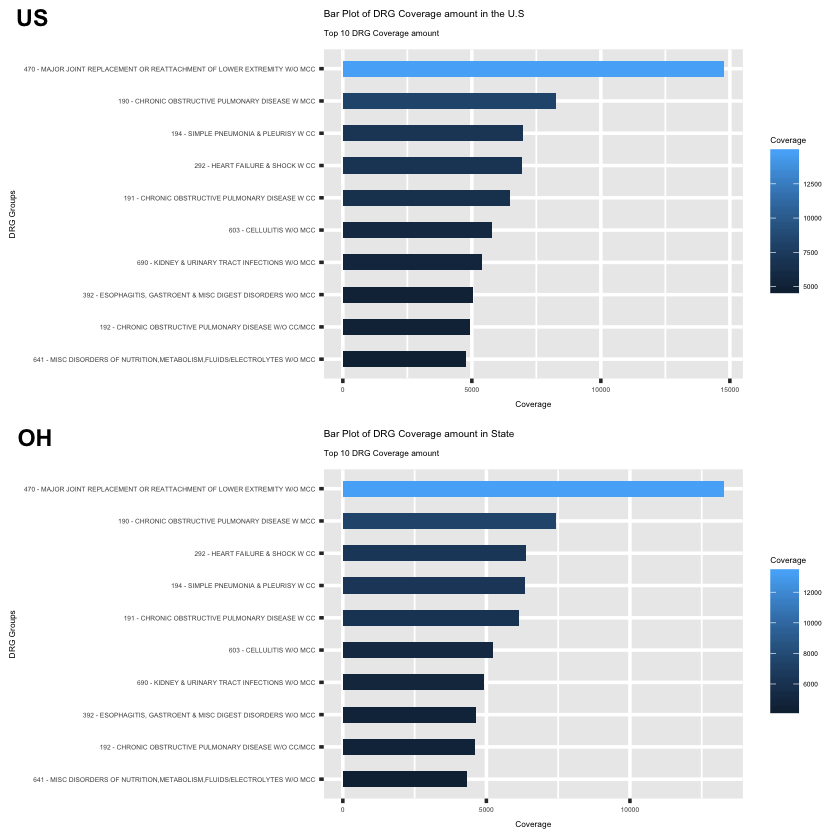

In [243]:
## Test1
Top10_DRG("OH")

In [235]:
## Test2
Top10_DRG("CA")

[1] "Based on our data, this States is Ok! you may not need to change policies"


# Conclusion

How Medicare should change it's policies in the future? 

We have defined the top 10 Sates which are in a bad condition based on their Death Rates and Income levels, e.g. West Virginia, Mississippi, Kentucky, Alabama, etc. The medicare payments tend to be fairly low while higher mortality rate and lower income levels are also observed. 

Moreover, we have done further analysis on the most common DRG groups in the Sates which are not in a desirable situation in terms of medicare assistance. Our analysis reveals that the avegrage total medicare payment to some extent varies for each of the top 10 DRG groups within those states.

In conclusion, Medicare would better to consider some adjustment in its' policies such as adjusting its' coverage costs for the most common DRG groups in States which were classified as being in an undesirable situation. This could lead to more healthcare accessibility for lower income people in specific states and thus could help decrease the mortality level.   




## References 

1.[Main data](https://data.cms.gov/Medicare-Inpatient/Inpatient-Prospective-Payment-System-IPPS-Provider/97k6-zzx3)

2.[Median income data]( https://www.census.gov/search-results.html?searchType=web&cssp=SERP&q=income%20data)

3.[Mortality rate data]( https://www.kff.org/other/state-indicator/death-rate-per-100000/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D)
